# Project: Predicting Diabetes Onset FHIR EHR Data
### Notebook: 04_EDA.ipynb
### Purpose & Objectives: 
* Exploratory data analysis
* Brief structural integrity checks for features dataframe
* Response class imbalance investigation
* Missingness patterns across all patients and labs
* Inspect key features' ranges, distributions
* Investigate if there is a true difference between controls and cases


# EDA Summary
* The dataset contains 396 patients with one row per patient.
* Label prevalence is non-trivial, supporting supervised learning.
* Missingness patterns are clinically plausible and selective.
* Core features show reasonable distributions with mild skew.
* Several features show separation between cases and controls, motivating downstream modeling.

See code below supporting above conclusions.

In [2]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# load features dataframe
df = pd.read_csv('/Users/sanasiddiqui/Desktop/Current Desktop/Data Portfolio Projects/Diabetes_Onset_Prediction_FHIR/Data_Diabetes_Prediction/Cleaned/df_features_master.csv')

In [4]:
# inspect features df

df.shape, df.head()

((396, 40),
                              patient_id  label  bmi_mean  body_height_mean  \
 0  011dcab7-8543-84f8-5842-fa84972bbf25      1    29.750             186.0   
 1  019dd1e7-5307-5d8a-c04f-8693c0ebdf35      0    15.995              98.2   
 2  02aa3df1-6e90-e28f-abf3-8a5647f49707      0    22.530             185.4   
 3  02c16628-45fc-609a-fed2-bc5a582f33bd      1    29.920             173.9   
 4  043cc39f-934c-f0ad-ba8e-c6b241697203      1    27.090             178.5   
 
    body_weight_mean  creatinine_mean  hdl_cholesterol_mean  heart_rate_mean  \
 0            102.90             15.0                 55.95             72.0   
 1             15.45             15.0                   NaN             79.0   
 2             77.40             16.0                   NaN             96.0   
 3             90.50             12.0                 63.86             90.0   
 4             86.30             15.0                   NaN             93.0   
 
    ldl_cholesterol_mean  tota

In [5]:
# data types
df.dtypes

patient_id                            object
label                                  int64
bmi_mean                             float64
body_height_mean                     float64
body_weight_mean                     float64
creatinine_mean                      float64
hdl_cholesterol_mean                 float64
heart_rate_mean                      float64
ldl_cholesterol_mean                 float64
total_cholesterol_mean               float64
bmi_last_value                       float64
body_height_last_value               float64
body_weight_last_value               float64
creatinine_last_value                float64
hdl_cholesterol_last_value           float64
heart_rate_last_value                float64
ldl_cholesterol_last_value           float64
total_cholesterol_last_value         float64
bmi_count_value                      float64
body_height_count_value              float64
body_weight_count_value              float64
creatinine_count_value               float64
hdl_choles

In [6]:
# ensure each row is a unique patient

df['patient_id'].nunique()

396

In [7]:
# response class value counts
df['label'].value_counts(normalize=True)

label
0    0.85101
1    0.14899
Name: proportion, dtype: float64

##### The cohort shows a non-trivial prevalence of diabetes onset (15% cases of diabetes), supporting supervised modeling.

## Missingness

In [10]:
missing_rates = (
    df.filter(like='_missing')
    .mean()
    .sort_values(ascending=False)
)
missing_rates

hdl_cholesterol_mean_missing      0.714646
ldl_cholesterol_mean_missing      0.714646
total_cholesterol_mean_missing    0.714646
creatinine_mean_missing           0.000000
dtype: float64

### Cholesterol-related labs show partial missingness, consistent with selective lab ordering in clinical care
### All patients had creatinine drawn as part of BMP/CMP

In [12]:
df.drop(columns=['creatinine_mean_missing'], inplace=True), df.shape

(None, (396, 39))

In [13]:
df.isna().mean().sort_values(ascending=False)

hdl_cholesterol_last_value           0.714646
ldl_cholesterol_mean                 0.714646
ldl_cholesterol_last_value           0.714646
total_cholesterol_days_since_last    0.714646
hdl_cholesterol_days_since_last      0.714646
ldl_cholesterol_days_since_last      0.714646
hdl_cholesterol_count_value          0.714646
total_cholesterol_mean               0.714646
ldl_cholesterol_count_value          0.714646
hdl_cholesterol_mean                 0.714646
total_cholesterol_count_value        0.714646
total_cholesterol_last_value         0.714646
bmi_count_value                      0.007576
bmi_last_value                       0.007576
bmi_days_since_last                  0.007576
bmi_mean                             0.007576
body_weight_count_value              0.002525
body_height_days_since_last          0.002525
body_height_count_value              0.002525
body_weight_last_value               0.002525
body_height_last_value               0.002525
body_weight_mean                  

In [14]:
# drop all cholesterol related columns with raw values due to missingness
# keep cholsterol missing flags as a feature

cols_to_drop = [
    'hdl_cholesterol_mean',
    'hdl_cholesterol_last_value',
    'hdl_cholesterol_count_value',
    'hdl_cholesterol_days_since_last',
    'ldl_cholesterol_mean',
    'ldl_cholesterol_last_value',
    'ldl_cholesterol_count_value',
    'ldl_cholesterol_days_since_last',
    'total_cholesterol_mean',
    'total_cholesterol_last_value',
    'total_cholesterol_count_value',
    'total_cholesterol_days_since_last'
]

df.drop(columns=cols_to_drop, inplace=True)

In [15]:
df.isna().mean().sort_values(ascending=False)

bmi_days_since_last               0.007576
bmi_mean                          0.007576
bmi_count_value                   0.007576
bmi_last_value                    0.007576
body_height_last_value            0.002525
body_weight_days_since_last       0.002525
body_weight_count_value           0.002525
body_height_days_since_last       0.002525
body_height_count_value           0.002525
body_weight_mean                  0.002525
body_height_mean                  0.002525
body_weight_last_value            0.002525
total_cholesterol_mean_missing    0.000000
ldl_cholesterol_mean_missing      0.000000
hdl_cholesterol_mean_missing      0.000000
total_labs                        0.000000
heart_rate_days_since_last        0.000000
creatinine_days_since_last        0.000000
patient_id                        0.000000
heart_rate_count_value            0.000000
creatinine_count_value            0.000000
label                             0.000000
heart_rate_last_value             0.000000
creatinine_

In [35]:
df.isna().sum().sort_values(ascending=False)

bmi_days_since_last               3
bmi_mean                          3
bmi_count_value                   3
bmi_last_value                    3
body_height_last_value            1
body_weight_days_since_last       1
body_weight_count_value           1
body_height_days_since_last       1
body_height_count_value           1
body_weight_mean                  1
body_height_mean                  1
body_weight_last_value            1
total_cholesterol_mean_missing    0
ldl_cholesterol_mean_missing      0
hdl_cholesterol_mean_missing      0
total_labs                        0
heart_rate_days_since_last        0
creatinine_days_since_last        0
patient_id                        0
heart_rate_count_value            0
creatinine_count_value            0
label                             0
heart_rate_last_value             0
creatinine_last_value             0
heart_rate_mean                   0
creatinine_mean                   0
unique_labs                       0
dtype: int64

In [37]:
df = df.dropna()

In [39]:
df.isna().sum().sort_values(ascending=False)

patient_id                        0
body_weight_count_value           0
total_labs                        0
total_cholesterol_mean_missing    0
ldl_cholesterol_mean_missing      0
hdl_cholesterol_mean_missing      0
heart_rate_days_since_last        0
creatinine_days_since_last        0
body_weight_days_since_last       0
body_height_days_since_last       0
bmi_days_since_last               0
heart_rate_count_value            0
creatinine_count_value            0
body_height_count_value           0
label                             0
bmi_count_value                   0
heart_rate_last_value             0
creatinine_last_value             0
body_weight_last_value            0
body_height_last_value            0
bmi_last_value                    0
heart_rate_mean                   0
creatinine_mean                   0
body_weight_mean                  0
body_height_mean                  0
bmi_mean                          0
unique_labs                       0
dtype: int64

# Distribution of Core Features

In [45]:
# Helper function to plot histogram

def plot_histogram(df, column: str, title: str, xlabel: str, ylabel: str):
    df[column].hist(bins=30)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [49]:
df.columns

Index(['patient_id', 'label', 'bmi_mean', 'body_height_mean',
       'body_weight_mean', 'creatinine_mean', 'heart_rate_mean',
       'bmi_last_value', 'body_height_last_value', 'body_weight_last_value',
       'creatinine_last_value', 'heart_rate_last_value', 'bmi_count_value',
       'body_height_count_value', 'body_weight_count_value',
       'creatinine_count_value', 'heart_rate_count_value',
       'bmi_days_since_last', 'body_height_days_since_last',
       'body_weight_days_since_last', 'creatinine_days_since_last',
       'heart_rate_days_since_last', 'hdl_cholesterol_mean_missing',
       'ldl_cholesterol_mean_missing', 'total_cholesterol_mean_missing',
       'total_labs', 'unique_labs'],
      dtype='object')

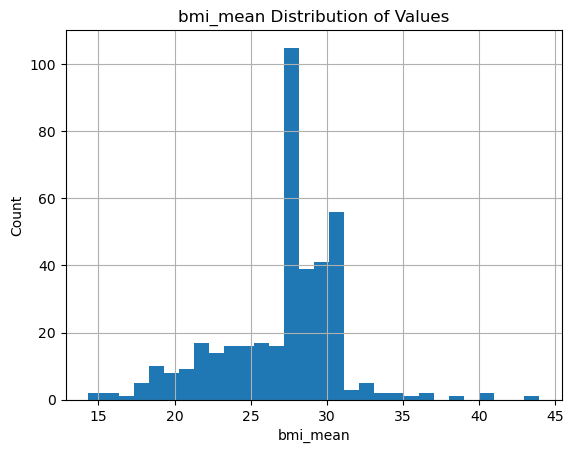

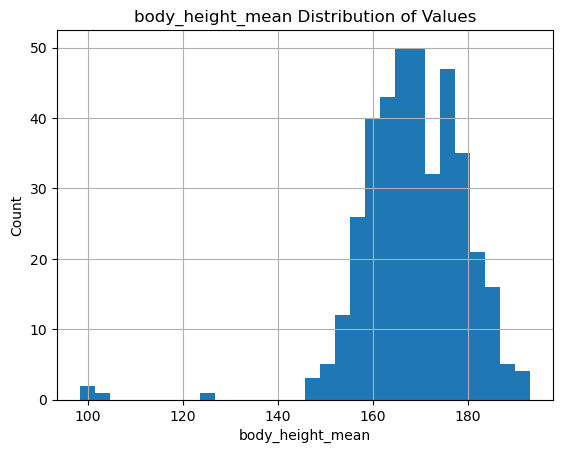

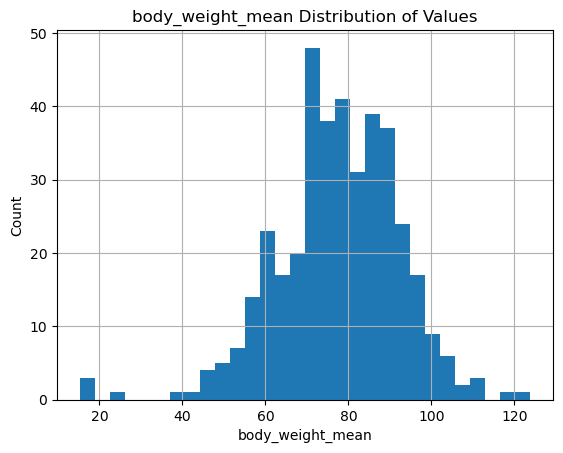

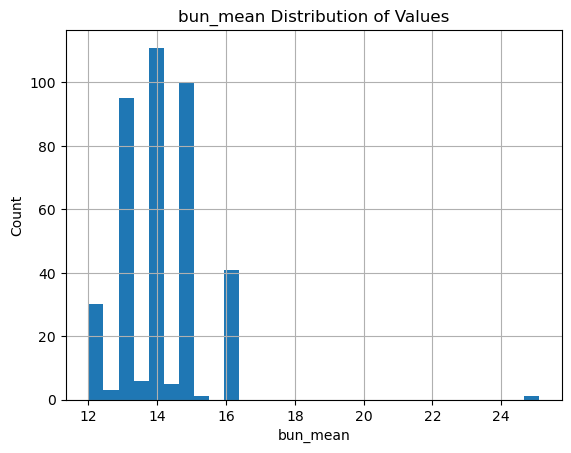

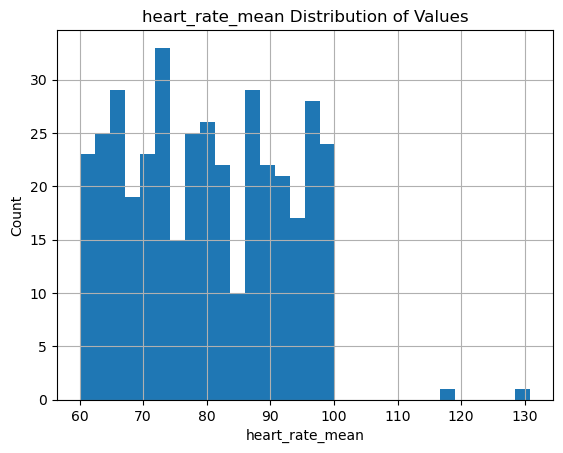

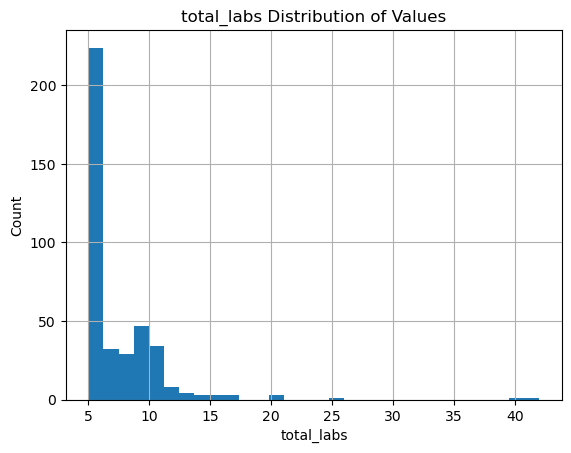

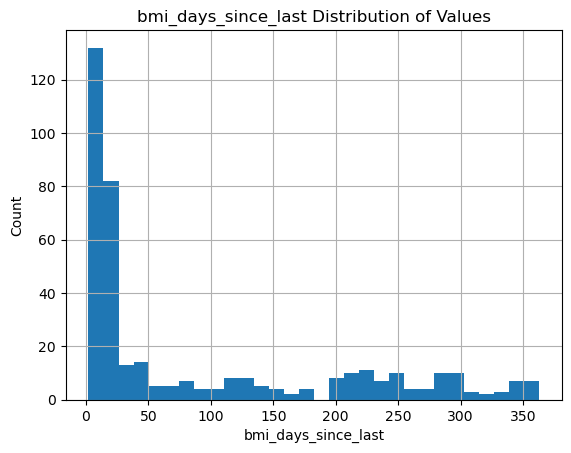

In [84]:
cols_to_plot = [
        'bmi_mean', 
        'body_height_mean',
        'body_weight_mean',
        'bun_mean', 
        'heart_rate_mean',
        'total_labs',
        'bmi_days_since_last'
]

for col in cols_to_plot:
    plot_histogram(df, 
                   column=col, 
                   title=f"{col} Distribution of Values", 
                   xlabel=col, 
                   ylabel='Count')

In [62]:
# temporary label mapping for boxlots
label_map = {
    0 : 'Non-Diabetic',
    1 : 'Diabetic'
}
df['label_name'] = df['label'].map(label_map)

# Case vs. Control Boxplots

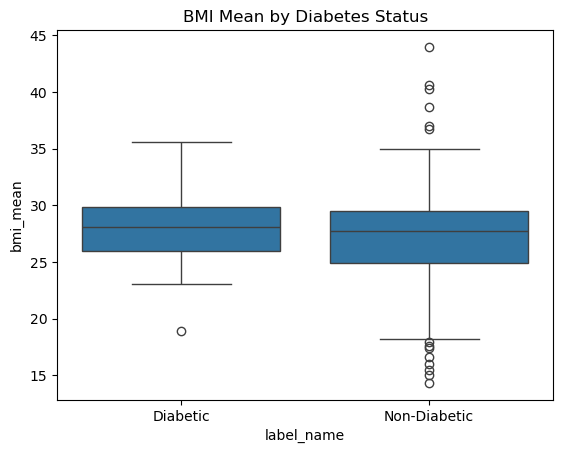

In [64]:
sns.boxplot(x='label_name',y='bmi_mean',data=df)
plt.title('BMI Mean by Diabetes Status')
plt.show()

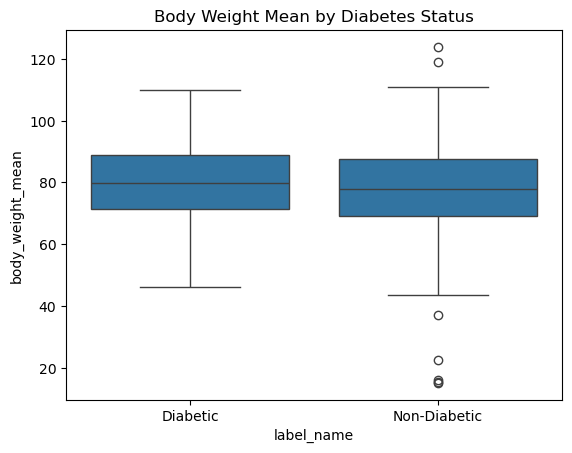

In [66]:
sns.boxplot(x='label_name',y='body_weight_mean',data=df)
plt.title('Body Weight Mean by Diabetes Status')
plt.show()

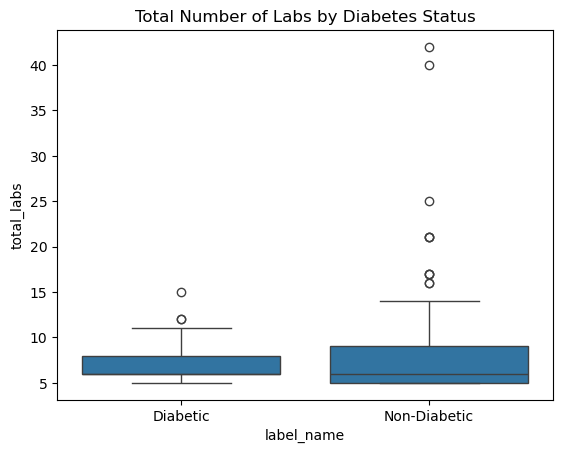

In [68]:
sns.boxplot(x='label_name',y='total_labs',data=df)
plt.title('Total Number of Labs by Diabetes Status')
plt.show()

# Correlation

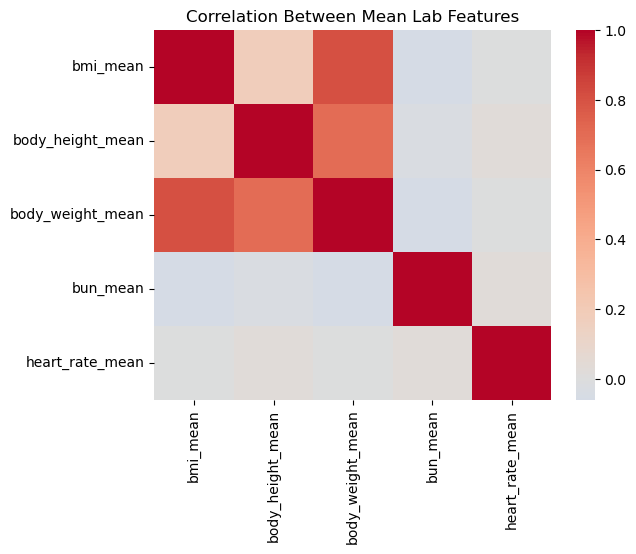

In [86]:
# correlation between mean lab features

mean_cols = [c for c in df.columns if c.endswith('_mean')]
corr = df[mean_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Between Mean Lab Features')
plt.show()

##### At this point, on closer inspection we discover that the creatinine values in the creatinine mean column do not represent typical or atypical values for creatinine. On further investigaiton of values, we discovered that these values are actually representaive of Blood Urea Nitrogen levels (BUN) which is also routinely obtained on basic and complete metabolic panels (BMP/CMP). We have decided to rename the creatinine columns to reflect the correct lab value. All graphs/plots above have been updated to reflect BUN values.

In [78]:
# inspect creatinine values

df['creatinine_mean'].describe()

count    393.000000
mean      14.085270
std        1.247307
min       12.000000
25%       13.000000
50%       14.000000
75%       15.000000
max       25.110000
Name: creatinine_mean, dtype: float64

In [80]:
df.columns

Index(['patient_id', 'label', 'bmi_mean', 'body_height_mean',
       'body_weight_mean', 'creatinine_mean', 'heart_rate_mean',
       'bmi_last_value', 'body_height_last_value', 'body_weight_last_value',
       'creatinine_last_value', 'heart_rate_last_value', 'bmi_count_value',
       'body_height_count_value', 'body_weight_count_value',
       'creatinine_count_value', 'heart_rate_count_value',
       'bmi_days_since_last', 'body_height_days_since_last',
       'body_weight_days_since_last', 'creatinine_days_since_last',
       'heart_rate_days_since_last', 'hdl_cholesterol_mean_missing',
       'ldl_cholesterol_mean_missing', 'total_cholesterol_mean_missing',
       'total_labs', 'unique_labs', 'label_name'],
      dtype='object')

In [82]:
# rename all creatinine columns to BUN

df = df.rename(columns={
    'creatinine_mean': 'bun_mean',
    'creatinine_last_value': 'bun_last_value',
    'creatinine_count_value': 'bun_count_value',
    'creatinine_days_since_last': 'bun_days_since_last'
})
df.columns

Index(['patient_id', 'label', 'bmi_mean', 'body_height_mean',
       'body_weight_mean', 'bun_mean', 'heart_rate_mean', 'bmi_last_value',
       'body_height_last_value', 'body_weight_last_value', 'bun_last_value',
       'heart_rate_last_value', 'bmi_count_value', 'body_height_count_value',
       'body_weight_count_value', 'bun_count_value', 'heart_rate_count_value',
       'bmi_days_since_last', 'body_height_days_since_last',
       'body_weight_days_since_last', 'bun_days_since_last',
       'heart_rate_days_since_last', 'hdl_cholesterol_mean_missing',
       'ldl_cholesterol_mean_missing', 'total_cholesterol_mean_missing',
       'total_labs', 'unique_labs', 'label_name'],
      dtype='object')

In [90]:
# save updated df

df.to_csv('/Users/sanasiddiqui/Desktop/Current Desktop/Data Portfolio Projects/Diabetes_Onset_Prediction_FHIR/Data_Diabetes_Prediction/Cleaned/df_final.csv', 
          index=False)